In [ ]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
#As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [ ]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()


In [ ]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [ ]:
df = df.drop(df[df.Cholesterol == 0].index)


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")


                   Age     MaxHR   Oldpeak  RestingBP  HeartDisease
Age           1.000000 -0.382112  0.286006   0.259865      0.298617
MaxHR        -0.382112  1.000000 -0.259533  -0.125774     -0.377212
Oldpeak       0.286006 -0.259533  1.000000   0.198575      0.495696
RestingBP     0.259865 -0.125774  0.198575   1.000000      0.173242
HeartDisease  0.298617 -0.377212  0.495696   0.173242      1.000000


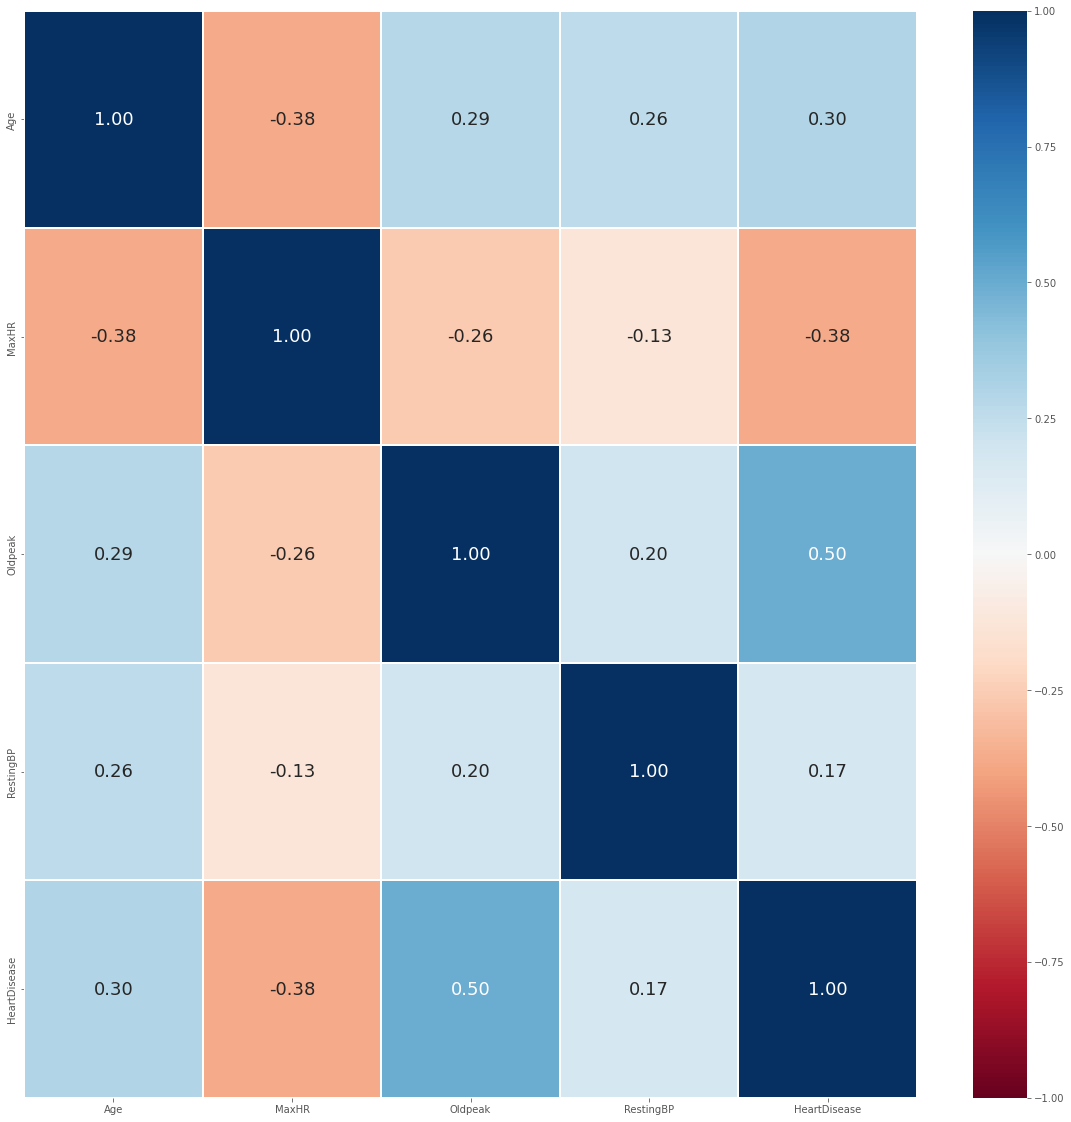

In [ ]:
# Correlation Matrix
variableDB = pd.DataFrame(df[['Age', 'MaxHR', 'Oldpeak','RestingBP', 'HeartDisease']])
print(variableDB.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sns.heatmap(variableDB.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

[]

<Figure size 1080x720 with 0 Axes>

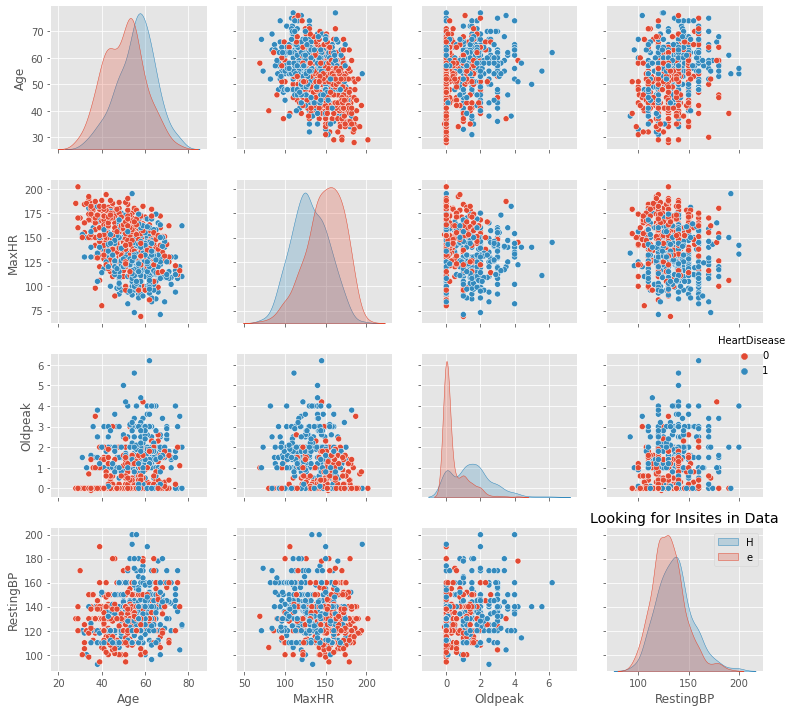

In [ ]:

plt.figure(figsize=(15,10))
sns.pairplot(variableDB,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

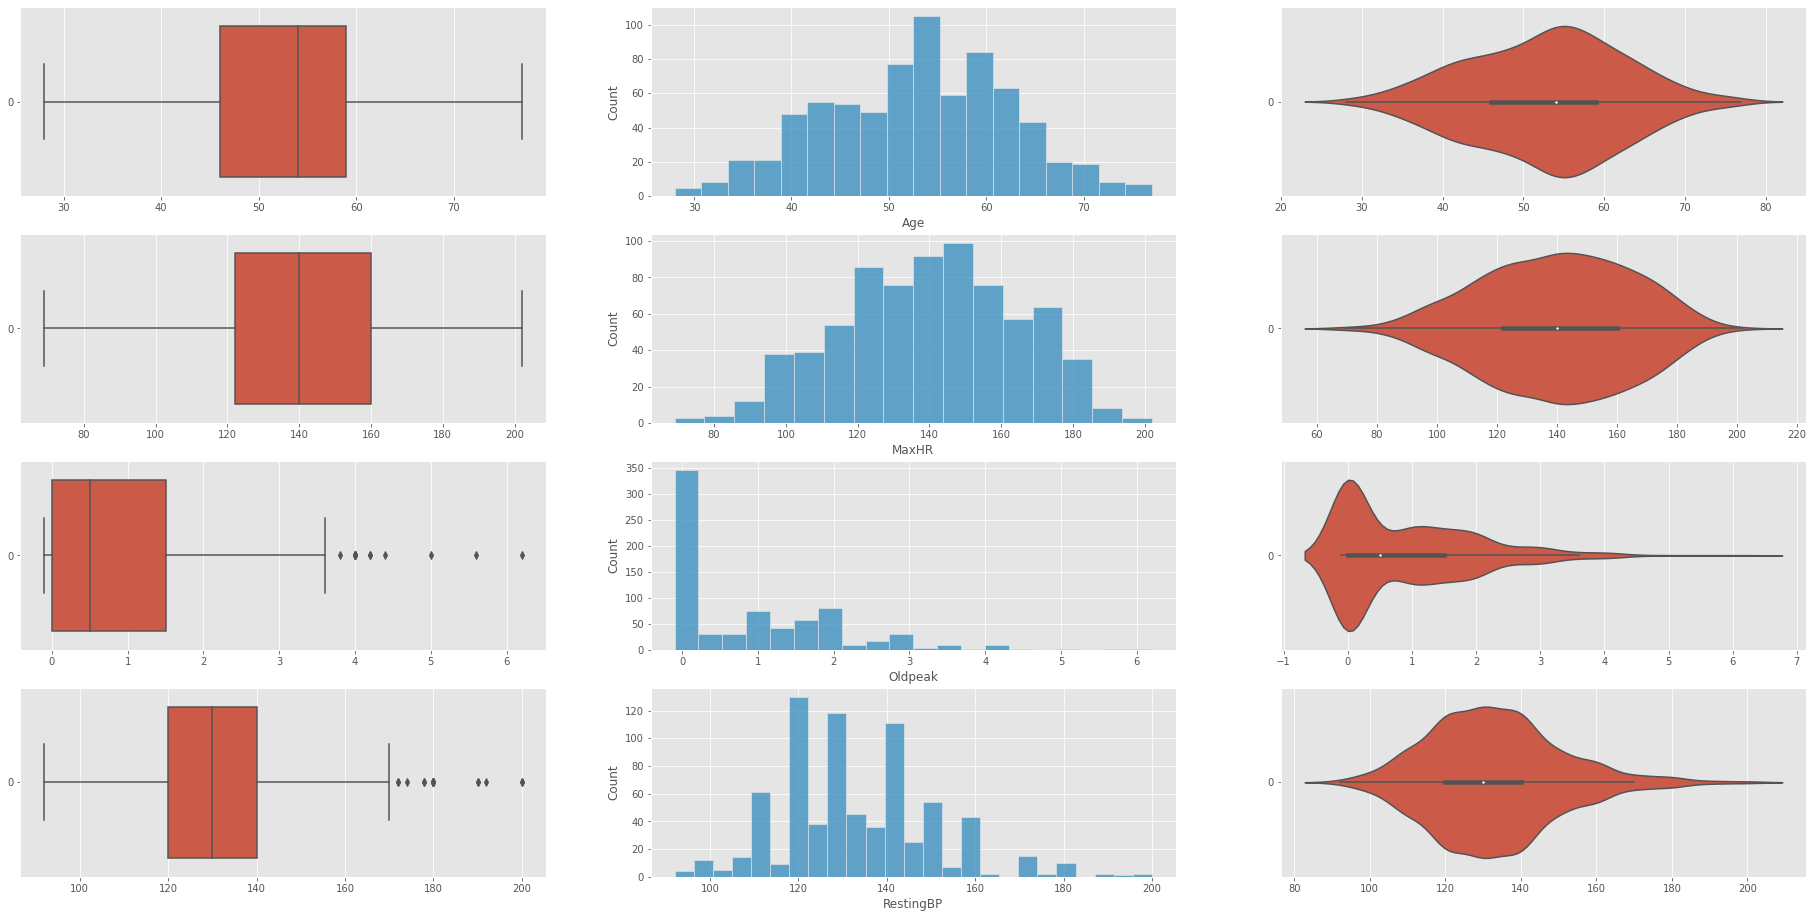

In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(32, 16))

# Plot the basic uni-variate figures for Age
sns.boxplot(data = variableDB['Age'] ,orient = "h", ax = axes[0,0])
sns.histplot(data = variableDB['Age'] , ax = axes[0,1])
sns.violinplot(data = variableDB['Age'] , orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for MaxHR
sns.boxplot(data = variableDB['MaxHR'] , orient = "h", ax = axes[1,0])
sns.histplot(data = variableDB['MaxHR'] , ax = axes[1,1])
sns.violinplot(data = variableDB['MaxHR'] , orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Oldpeak
sns.boxplot(data = variableDB['Oldpeak'] , orient = "h", ax = axes[2,0])
sns.histplot(data = variableDB['Oldpeak'] , ax = axes[2,1])
sns.violinplot(data = variableDB['Oldpeak'] , orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for RestingBP
sns.boxplot(data = variableDB['RestingBP'] , orient = "h", ax = axes[3,0])
sns.histplot(data = variableDB['RestingBP'] , ax = axes[3,1])
sns.violinplot(data = variableDB['RestingBP'] , orient = "h", ax = axes[3,2])


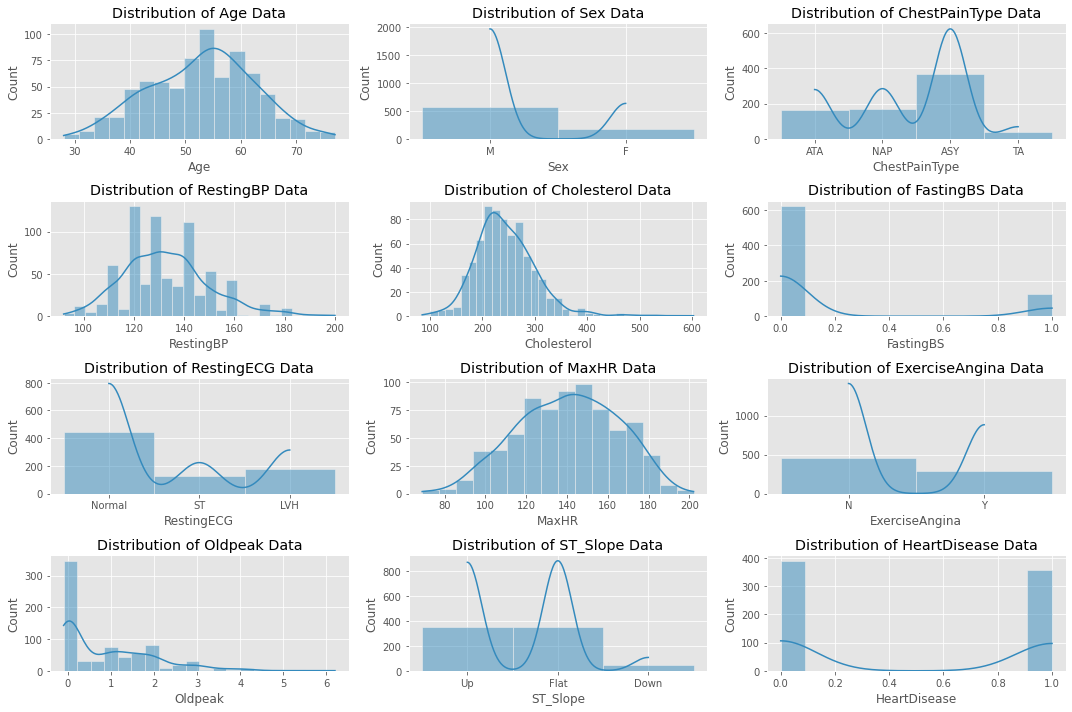

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
  

In [ ]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    string 
 2   ChestPainType   746 non-null    string 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    string 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    string 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    string 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 91.9 KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#USING LOGISITIC REGRESSION

#TRAIN TEST SPLIT FOR MACHINE LEARNING

In [ ]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(variableDB.drop('HeartDisease',axis=1), variableDB['HeartDisease'], test_size=.2, random_state=22)
X_train.shape,X_test.shape





((596, 4), (150, 4))

In [ ]:
from sklearn.linear_model import LogisticRegression #model
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.metrics import classification_report 

logreg = LogisticRegression(solver='liblinear',max_iter=10000)

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

#ACCURARY OF X_train, X_test

In [ ]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

#Split the data into indiviual train and test set
agedata_train = pd.DataFrame(X_train['Age'])
maxhrdata_train= pd.DataFrame(X_train['MaxHR'])
oldpeakdata_train = pd.DataFrame(X_train['Oldpeak'])
RestingBP_train = pd.DataFrame(X_train['RestingBP'])
heartdata_train = y_train


agedata_test = pd.DataFrame(X_test['Age'])
maxhrdata_test= pd.DataFrame(X_test['MaxHR'])
oldpeakdata_test = pd.DataFrame(X_test['Oldpeak'])
RestingBP_test = pd.DataFrame(X_test['RestingBP'])
heartdata_test = y_test

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.761744966442953
True positive rate  	: 0.7142857142857143
false positive rate  	: 0.1962025316455696
True negative rate  	: 0.8037974683544303
false negative rate  	: 0.2857142857142857

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7466666666666667
True positive rate  	: 0.6842105263157895
false positive rate  	: 0.1891891891891892
True negative rate  	: 0.8108108108108109
false negative rate  	: 0.3157894736842105



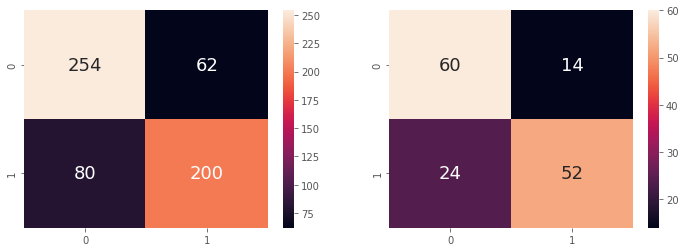

In [ ]:

# Predict the variableDB corresponding to heart data  Train
y_train_pred = logreg.predict(X_train)

# Predict  variableDB corresponding to Total Test
y_test_pred = logreg.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(X_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(X_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#ACCURACY OLDPEAK Logisitic Reg

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7516778523489933
True positive rate  	: 0.7071428571428572
false positive rate  	: 0.2088607594936709
True negative rate  	: 0.7911392405063291
false negative rate  	: 0.29285714285714287

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7533333333333333
True positive rate  	: 0.7236842105263158
false positive rate  	: 0.21621621621621623
True negative rate  	: 0.7837837837837838
false negative rate  	: 0.27631578947368424



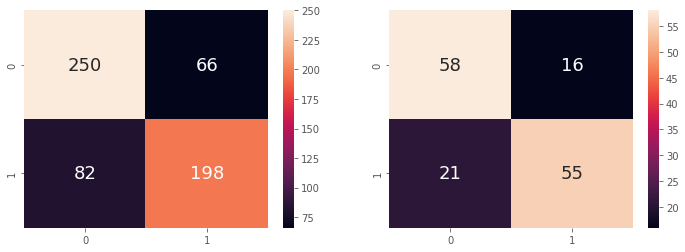

In [ ]:
logreg.fit(oldpeakdata_train,y_train)

# Predict the variableDB corresponding to heart data  Train
y_train_pred = logreg.predict(oldpeakdata_train)

# Predict  variableDB corresponding to Total Test
y_test_pred = logreg.predict(oldpeakdata_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(oldpeakdata_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(oldpeakdata_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#ACCURACY AGE

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6543624161073825
True positive rate  	: 0.5678571428571428
false positive rate  	: 0.2689873417721519
True negative rate  	: 0.7310126582278481
false negative rate  	: 0.43214285714285716

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6066666666666667
True positive rate  	: 0.5
false positive rate  	: 0.28378378378378377
True negative rate  	: 0.7162162162162162
false negative rate  	: 0.5



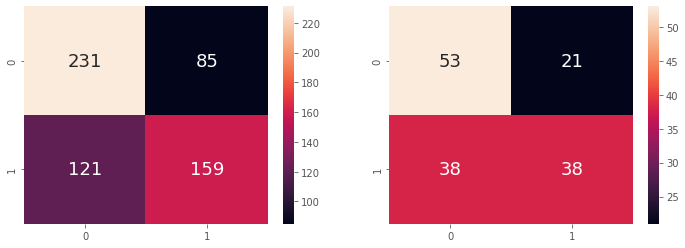

In [ ]:
logreg.fit(agedata_train,y_train)

# Predict the heart disease corresponding to age data  Train
y_train_pred = logreg.predict(agedata_train)

# Predict  heart disease corresponding to age data Test
y_test_pred = logreg.predict(agedata_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(agedata_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(agedata_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#ACCURACY MAXHR

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6895973154362416
True positive rate  	: 0.5928571428571429
false positive rate  	: 0.22468354430379747
True negative rate  	: 0.7753164556962026
false negative rate  	: 0.40714285714285714

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6333333333333333
True positive rate  	: 0.5394736842105263
false positive rate  	: 0.2702702702702703
True negative rate  	: 0.7297297297297297
false negative rate  	: 0.4605263157894737



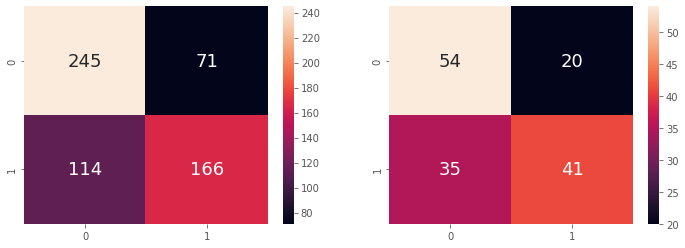

In [ ]:
logreg.fit(maxhrdata_train,y_train)

# Predict the heart disease corresponding to maxHR data  Train
y_train_pred = logreg.predict(maxhrdata_train)

# Predict  heart disease corresponding to maxHR data Test
y_test_pred = logreg.predict(maxhrdata_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(maxhrdata_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(maxhrdata_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#Accuracy of RestingBP


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5855704697986577
True positive rate  	: 0.3107142857142857
false positive rate  	: 0.17088607594936708
True negative rate  	: 0.8291139240506329
false negative rate  	: 0.6892857142857143

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.58
True positive rate  	: 0.3157894736842105
false positive rate  	: 0.14864864864864866
True negative rate  	: 0.8513513513513513
false negative rate  	: 0.6842105263157895



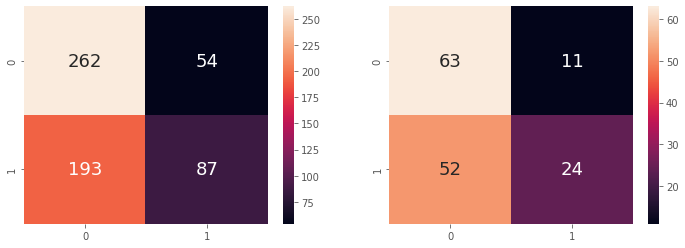

In [ ]:
logreg.fit(RestingBP_train,y_train)

# Predict the variableDB corresponding to heart data  Train
y_train_pred = logreg.predict(RestingBP_train)

# Predict  variableDB corresponding to Total Test
y_test_pred = logreg.predict(RestingBP_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(RestingBP_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", logreg.score(RestingBP_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#DECISION TREE FOR THE TOP 4 VARIABLES OLDPEAK, AGE, MAXHR, RestingBP

[Text(0.5201923076923077, 0.9285714285714286, 'Oldpeak <= 0.95\ngini = 0.498\nsamples = 596\nvalue = [316, 280]\nclass = Yes'),
 Text(0.225, 0.7857142857142857, 'Age <= 56.5\ngini = 0.372\nsamples = 332\nvalue = [250, 82]\nclass = Yes'),
 Text(0.08461538461538462, 0.6428571428571429, 'MaxHR <= 115.5\ngini = 0.279\nsamples = 239\nvalue = [199, 40]\nclass = Yes'),
 Text(0.046153846153846156, 0.5, 'Age <= 53.5\ngini = 0.48\nsamples = 20\nvalue = [12, 8]\nclass = Yes'),
 Text(0.03076923076923077, 0.35714285714285715, 'MaxHR <= 108.0\ngini = 0.408\nsamples = 14\nvalue = [10, 4]\nclass = Yes'),
 Text(0.015384615384615385, 0.21428571428571427, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Yes'),
 Text(0.046153846153846156, 0.21428571428571427, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Yes'),
 Text(0.06153846153846154, 0.35714285714285715, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = No'),
 Text(0.12307692307692308, 0.5, 'MaxHR <= 158.5\ngini = 0.25\nsamples = 219\nvalue 

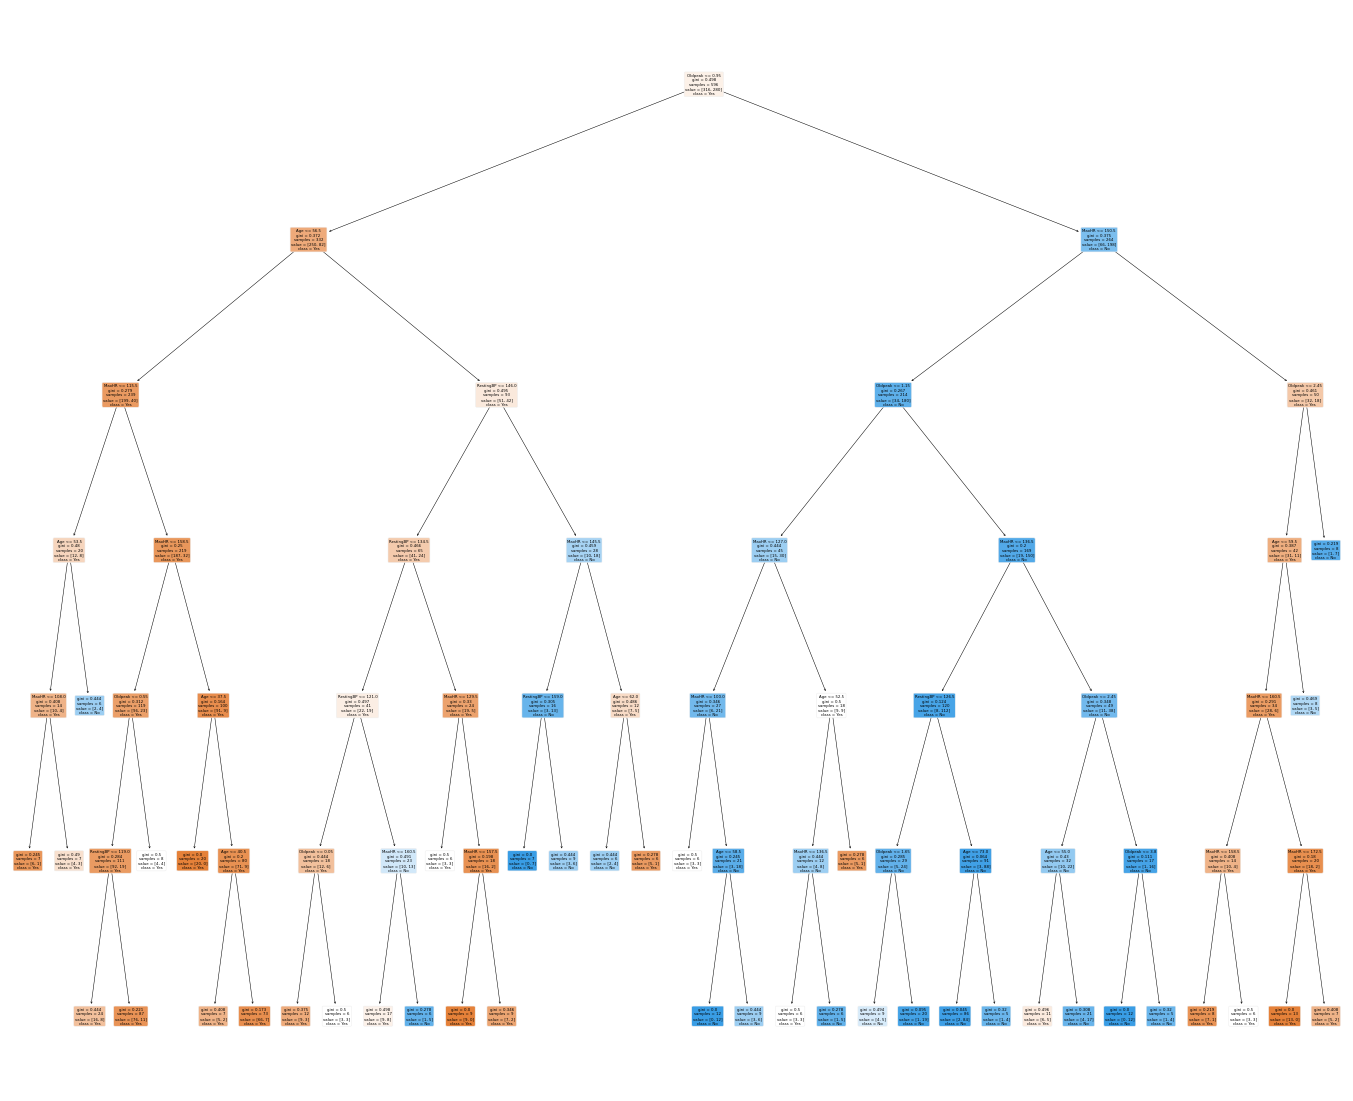

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=6, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

xvar = variableDB.drop('HeartDisease', axis=1)
feature_cols = xvar.columns

f = plt.figure(figsize=(24,20))
plot_tree(clf_pruned, filled=True, rounded=True, 
          feature_names= feature_cols, 
          class_names=["Yes","No"])

# ACCURACY AND RATES FOR VARIABLEDB (Decision Tree)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8271812080536913
True positive rate  	: 0.7357142857142858
false positive rate  	: 0.09177215189873418
True negative rate  	: 0.9082278481012658
false negative rate  	: 0.2642857142857143

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7
True positive rate  	: 0.5921052631578947
false positive rate  	: 0.1891891891891892
True negative rate  	: 0.8108108108108109
false negative rate  	: 0.40789473684210525



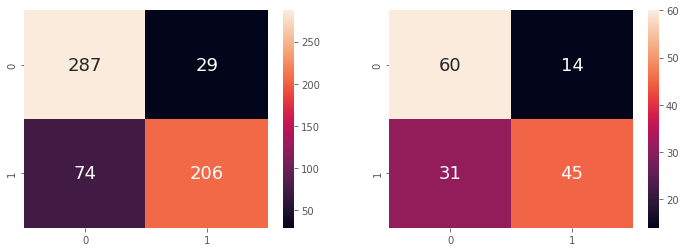

In [ ]:
# Predict the variableDB corresponding to heart data  Train
y_train_pred = clf_pruned.predict(X_train)

# Predict  variableDB corresponding to Total Test
y_test_pred = clf_pruned.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", clf_pruned.score(X_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", clf_pruned.score(X_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

## Calculating feature importance (Decision Tree)

In [ ]:

clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()

,FeatureImportance
Oldpeak,0.569294
MaxHR,0.227925
Age,0.142915
RestingBP,0.059866


#FEATURE IMPORTANCE GRAPH (Decision Tree)

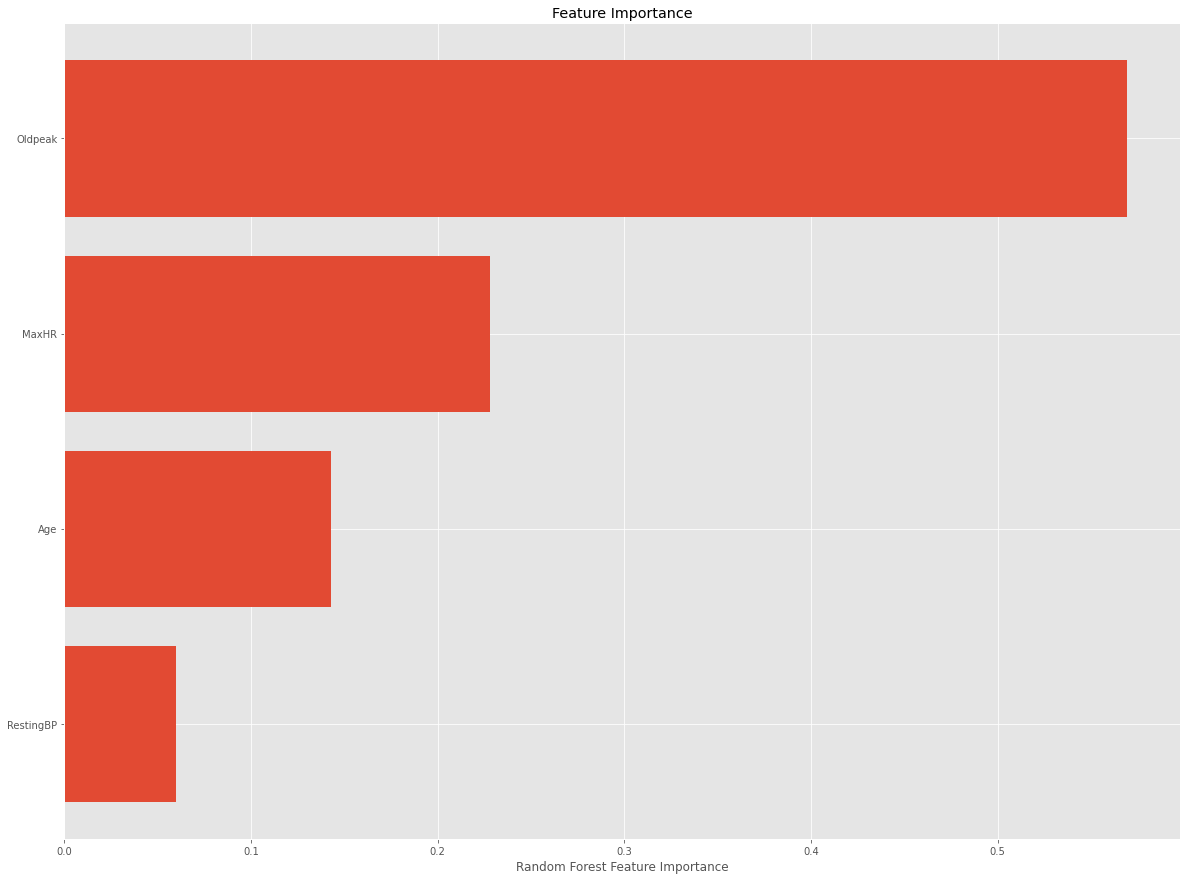

In [ ]:
plt.figure(figsize=(20,15))
importance = clf_pruned.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_cols[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [ ]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

#Split the data into indiviual train and test set
agedata_train = pd.DataFrame(X_train['Age'])
maxhrdata_train= pd.DataFrame(X_train['MaxHR'])
oldpeakdata_train = pd.DataFrame(X_train['Oldpeak'])
heartdata_train = y_train


agedata_test = pd.DataFrame(X_test['Age'])
maxhrdata_test= pd.DataFrame(X_test['MaxHR'])
oldpeakdata_test = pd.DataFrame(X_test['Oldpeak'])
heartdata_test = y_test



# DECISION TREE FOR OLDPEAK 


[Text(0.49107142857142855, 0.9, 'Oldpeak <= 0.95\ngini = 0.498\nsamples = 596\nvalue = [316, 280]\nclass = Yes'),
 Text(0.26785714285714285, 0.7, 'Oldpeak <= 0.45\ngini = 0.372\nsamples = 332\nvalue = [250, 82]\nclass = Yes'),
 Text(0.14285714285714285, 0.5, 'Oldpeak <= 0.15\ngini = 0.357\nsamples = 297\nvalue = [228, 69]\nclass = Yes'),
 Text(0.07142857142857142, 0.3, 'Oldpeak <= 0.05\ngini = 0.373\nsamples = 266\nvalue = [200, 66]\nclass = Yes'),
 Text(0.03571428571428571, 0.1, 'gini = 0.37\nsamples = 257\nvalue = [194, 63]\nclass = Yes'),
 Text(0.10714285714285714, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = Yes'),
 Text(0.21428571428571427, 0.3, 'Oldpeak <= 0.35\ngini = 0.175\nsamples = 31\nvalue = [28, 3]\nclass = Yes'),
 Text(0.17857142857142858, 0.1, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]\nclass = Yes'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Yes'),
 Text(0.39285714285714285, 0.5, 'Oldpeak <= 0.85\ngini = 0.467\nsamples = 35\nvalue 

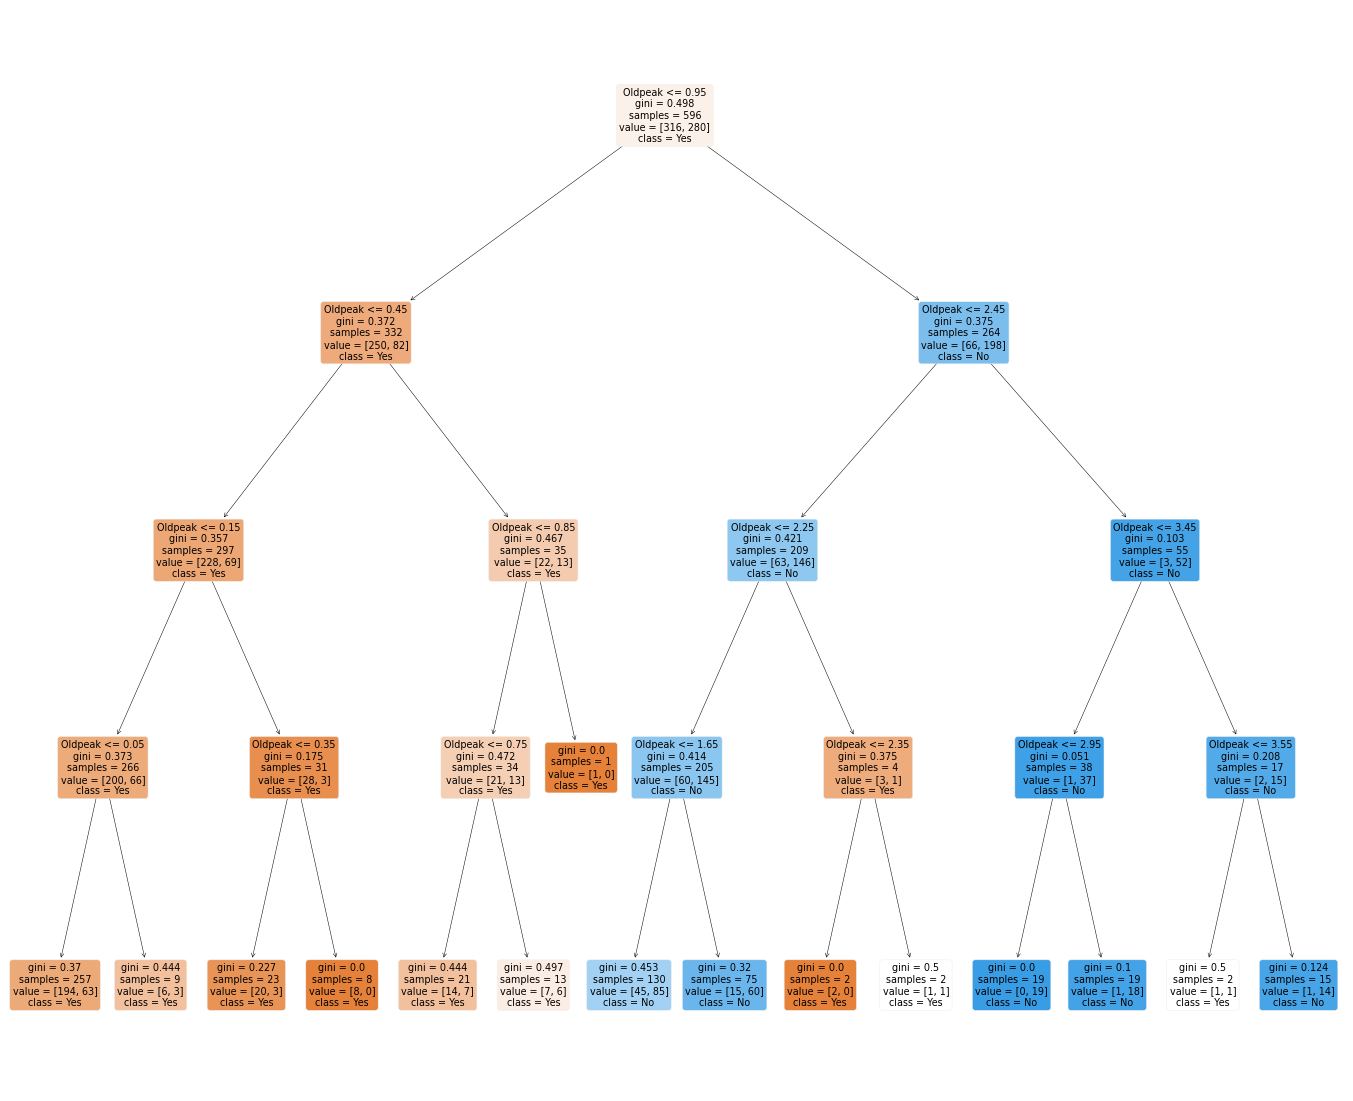

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(oldpeakdata_train,y_train)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Oldpeak"], 
          class_names=["Yes","No"])

# ACCURACY FOR OLDPEAK AND CONFUSION MATRIX FOR OLDPEAK (Decision Tree)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7550335570469798
True positive rate  	: 0.7
false positive rate  	: 0.1962025316455696
True negative rate  	: 0.8037974683544303
false negative rate  	: 0.3

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7466666666666667
True positive rate  	: 0.7105263157894737
false positive rate  	: 0.21621621621621623
True negative rate  	: 0.8037974683544303
false negative rate  	: 0.3



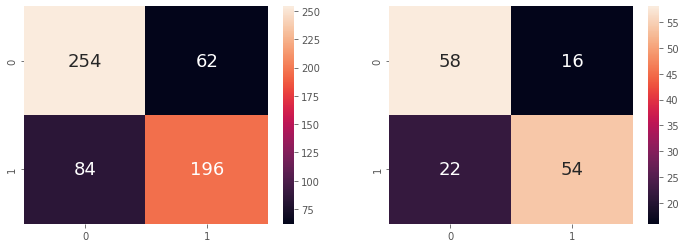

In [ ]:
# Predict oldpeak corresponding to heart data  Train
heartdata_train_pred = dectree.predict(oldpeakdata_train)

# Predict  corresponding to Total Test
heartdata_test_pred = dectree.predict(oldpeakdata_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(oldpeakdata_train, heartdata_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][1] +confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][1] + confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(oldpeakdata_test, heartdata_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[1][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[1][1] +confusion_matrix(heartdata_test, heartdata_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[0][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[0][1] + confusion_matrix(heartdata_test, heartdata_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(heartdata_train, heartdata_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(heartdata_test, heartdata_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

# ACCURACY FOR MAX HR AND CONFUSION MATRIX FOR MAX HR (Decision Tree)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6963087248322147
True positive rate  	: 0.5892857142857143
false positive rate  	: 0.2088607594936709
True negative rate  	: 0.7911392405063291
false negative rate  	: 0.4107142857142857

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.62
True positive rate  	: 0.5131578947368421
false positive rate  	: 0.2702702702702703
True negative rate  	: 0.7911392405063291
false negative rate  	: 0.4107142857142857



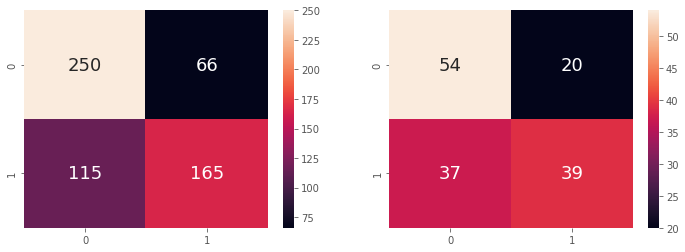

In [ ]:
#Classification accuracy for the other variables
# Predict heart values corresponding to max heartrate
dectree.fit(maxhrdata_train,heartdata_train)
heartdata_train_pred = dectree.predict(maxhrdata_train)
heartdata_test_pred = dectree.predict(maxhrdata_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(maxhrdata_train, heartdata_train))
print("True positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][1] +confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][1] + confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(maxhrdata_test, heartdata_test))
print("True positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[1][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[1][1] +confusion_matrix(heartdata_test, heartdata_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[0][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[0][1] + confusion_matrix(heartdata_test, heartdata_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(heartdata_train, heartdata_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(heartdata_test, heartdata_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])


#  ACCURACY FOR Age AND CONFUSION MATRIX FOR Age (Decision Tree)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6560402684563759
True positive rate  	: 0.5357142857142857
false positive rate  	: 0.23734177215189872
True negative rate  	: 0.7626582278481012
false negative rate  	: 0.4642857142857143

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5733333333333334
True positive rate  	: 0.42105263157894735
false positive rate  	: 0.2702702702702703
True negative rate  	: 0.7626582278481012
false negative rate  	: 0.4642857142857143



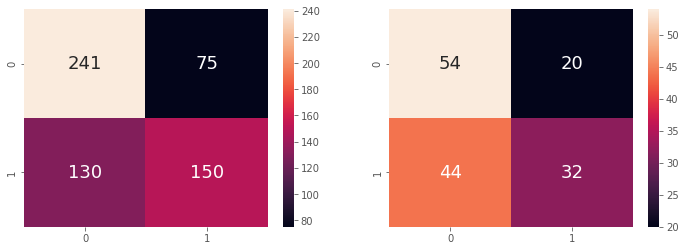

In [ ]:
#Classification accuracy for the other variables
# Predict heart values corresponding to age
dectree.fit(agedata_train,heartdata_train)
heartdata_train_pred = dectree.predict(agedata_train)
heartdata_test_pred = dectree.predict(agedata_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(agedata_train, heartdata_train))
print("True positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][1] +confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][1] + confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(agedata_test, heartdata_test))
print("True positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[1][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[1][1] +confusion_matrix(heartdata_test, heartdata_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[0][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[0][1] + confusion_matrix(heartdata_test, heartdata_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(heartdata_train, heartdata_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(heartdata_test, heartdata_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#Accuracy and confusion matrix for RestingBP (Decision Tree)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6073825503355704
True positive rate  	: 0.2857142857142857
false positive rate  	: 0.10759493670886076
True negative rate  	: 0.8924050632911392
false negative rate  	: 0.7142857142857143

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5933333333333334
True positive rate  	: 0.32894736842105265
false positive rate  	: 0.13513513513513514
True negative rate  	: 0.8924050632911392
false negative rate  	: 0.7142857142857143



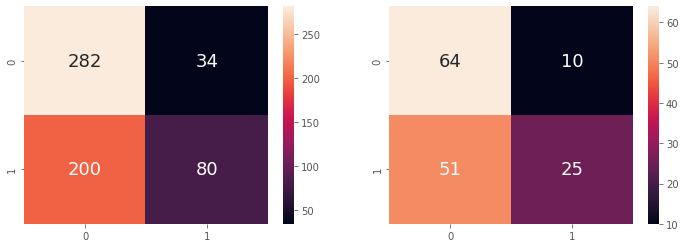

In [ ]:
#Classification accuracy for the other variables
# Predict heart values corresponding to age
dectree.fit(RestingBP_train,heartdata_train)
heartdata_train_pred = dectree.predict(RestingBP_train)
heartdata_test_pred = dectree.predict(RestingBP_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(RestingBP_train, heartdata_train))
print("True positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][1] +confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][1] + confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(RestingBP_test, heartdata_test))
print("True positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[1][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[1][1] +confusion_matrix(heartdata_test, heartdata_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[0][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[0][1] + confusion_matrix(heartdata_test, heartdata_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(heartdata_train, heartdata_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(heartdata_test, heartdata_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#**RANDOM FOREST CLASSIFIER**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=5)
from sklearn.metrics import accuracy_score



#ACCURACY FOR VARIABLE DB (RANDOM FOREST CLASSIFIER)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8389261744966443
True positive rate  	: 0.7892857142857143
false positive rate  	: 0.11708860759493671
True negative rate  	: 0.8829113924050633
false negative rate  	: 0.21071428571428572

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7666666666666667
True positive rate  	: 0.7105263157894737
false positive rate  	: 0.17567567567567569
True negative rate  	: 0.8243243243243243
false negative rate  	: 0.2894736842105263



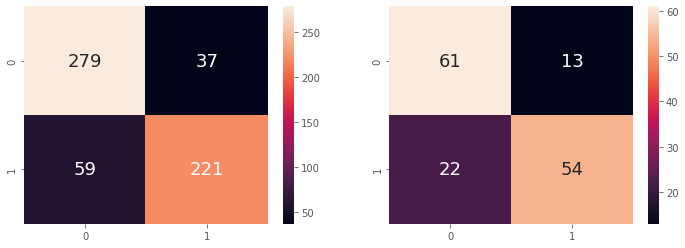

In [ ]:
rfc.fit(X_train,y_train)
#Train prediction
y_train_pred = rfc.predict(X_train)
#Test prediction
# Predict  variableDB corresponding to Total Test
y_test_pred = rfc.predict(X_test)
# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(X_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

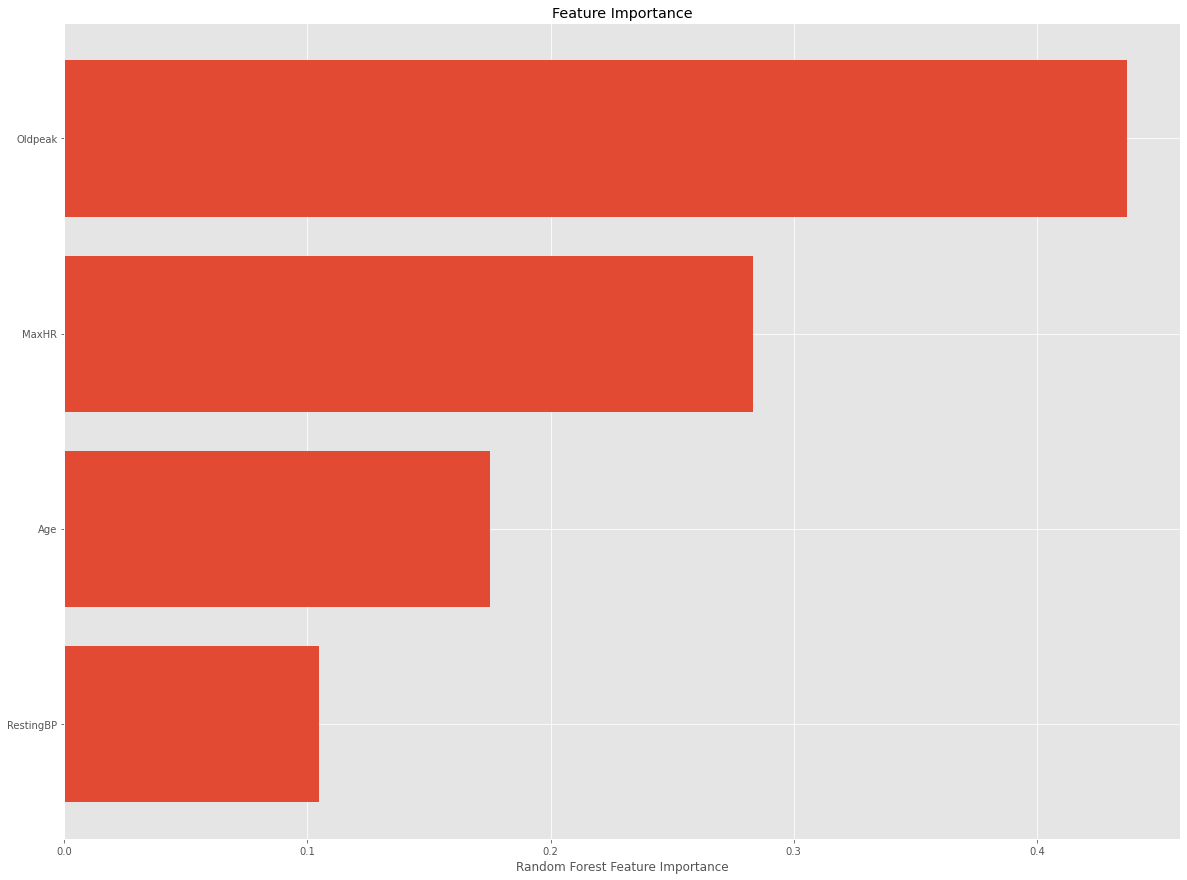

In [ ]:
plt.figure(figsize=(20,15))
importance = rfc.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_cols[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

#ACCURACY and Confusion Matrix FOR MAXHR (RANDOM FOREST CLASSIFIER)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7114093959731543
True positive rate  	: 0.7321428571428571
false positive rate  	: 0.3069620253164557
True negative rate  	: 0.6930379746835443
false negative rate  	: 0.26785714285714285

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5866666666666667
True positive rate  	: 0.5657894736842105
false positive rate  	: 0.3918918918918919
True negative rate  	: 0.6081081081081081
false negative rate  	: 0.4342105263157895



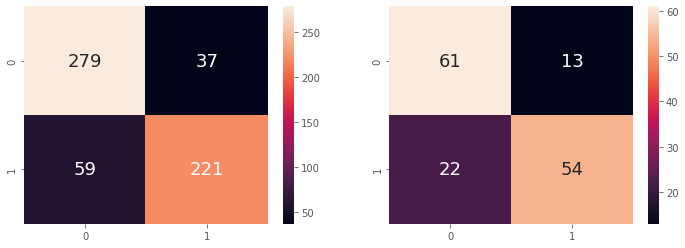

In [ ]:
# Predict heart values corresponding to max heartrate
rfc.fit(maxhrdata_train,y_train)
heartdata_train_pred = rfc.predict(maxhrdata_train)
heartdata_test_pred = rfc.predict(maxhrdata_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(maxhrdata_train, y_train))
print("True positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][1] +confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][1] + confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[0][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[0][0] +confusion_matrix(heartdata_train, heartdata_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_train, heartdata_train_pred)[1][0]/(confusion_matrix(heartdata_train, heartdata_train_pred)[1][0] + confusion_matrix(heartdata_train, heartdata_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(maxhrdata_test, y_test))
print("True positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[1][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[1][1] +confusion_matrix(heartdata_test, heartdata_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[0][1]/(confusion_matrix(heartdata_test, heartdata_test_pred)[0][1] + confusion_matrix(heartdata_test, heartdata_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[0][0]/(confusion_matrix(heartdata_test, heartdata_test_pred)[0][0] +confusion_matrix(heartdata_test, heartdata_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(heartdata_test, heartdata_test_pred)[1][0]/(confusion_matrix(heartdata_test, heartdata_test_pred)[1][0] + confusion_matrix(heartdata_test, heartdata_test_pred)[1][1]))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])


#ACCURACY AND CONFUSION MATRIX FOR AGE (RANDOM FOREST CLASSIFIER)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6560402684563759
True positive rate  	: 0.5571428571428572
false positive rate  	: 0.2563291139240506
True negative rate  	: 0.7436708860759493
false negative rate  	: 0.44285714285714284

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5666666666666667
True positive rate  	: 0.4342105263157895
false positive rate  	: 0.2972972972972973
True negative rate  	: 0.7027027027027027
false negative rate  	: 0.5657894736842105



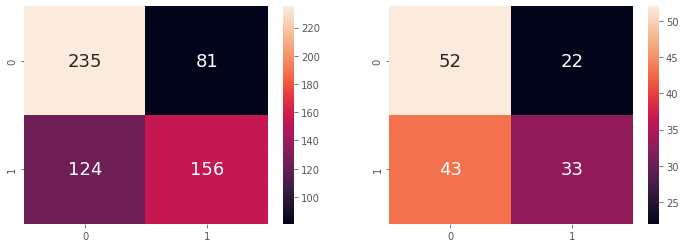

In [ ]:
#Calculate HERE
rfc.fit(agedata_train,y_train)
#Train prediction
y_train_pred = rfc.predict(agedata_train)
#Test prediction
# Predict  variableDB corresponding to Total Test
y_test_pred = rfc.predict(agedata_test)
# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(agedata_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(agedata_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#ACCURACY AND CONFUSION MATRIX FOR OLDPEAK (RANDOM FOREST CLASSIFIER)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7533557046979866
True positive rate  	: 0.6892857142857143
false positive rate  	: 0.189873417721519
True negative rate  	: 0.810126582278481
false negative rate  	: 0.3107142857142857

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7533333333333333
True positive rate  	: 0.7105263157894737
false positive rate  	: 0.20270270270270271
True negative rate  	: 0.7972972972972973
false negative rate  	: 0.2894736842105263



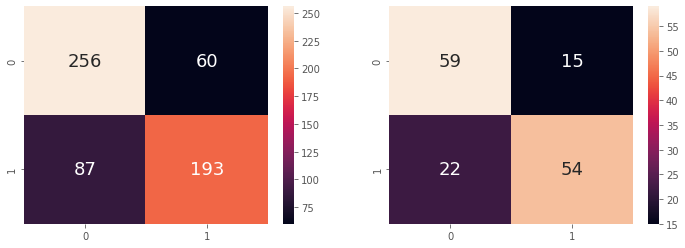

In [ ]:
#CALCULATE HERE

rfc.fit(oldpeakdata_train,y_train)

# Predict  Heartdisease corresponding to Oldpeak

#Train prediction
y_train_pred = rfc.predict(oldpeakdata_train)

#Test prediction
y_test_pred = rfc.predict(oldpeakdata_test)
# Plot the two-way Confusion Matrix

from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(oldpeakdata_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(oldpeakdata_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

#ACCURACY AND CONFUSION MATRIX FOR RestingBP (RANDOM FOREST CLASSIFIER)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6140939597315436
True positive rate  	: 0.4035714285714286
false positive rate  	: 0.19936708860759494
True negative rate  	: 0.8006329113924051
false negative rate  	: 0.5964285714285714

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5933333333333334
True positive rate  	: 0.39473684210526316
false positive rate  	: 0.20270270270270271
True negative rate  	: 0.7972972972972973
false negative rate  	: 0.6052631578947368



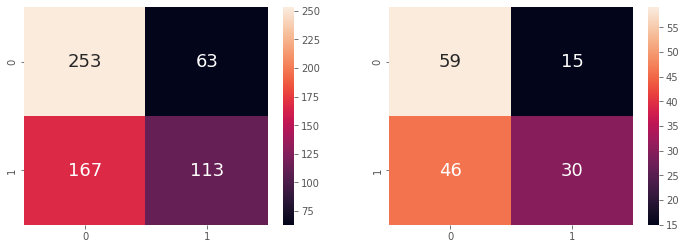

In [ ]:
#CALCULATE HERE

rfc.fit(RestingBP_train,y_train)

# Predict  Heartdisease corresponding to cholesterol

#Train prediction
y_train_pred = rfc.predict(RestingBP_train)

#Test prediction
y_test_pred = rfc.predict(RestingBP_test)
# Plot the two-way Confusion Matrix

from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(RestingBP_train, y_train))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_train, y_train_pred)[1][1]/(confusion_matrix(y_train, y_train_pred)[1][1] +confusion_matrix(y_train, y_train_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_train, y_train_pred)[0][1]/(confusion_matrix(y_train, y_train_pred)[0][1] + confusion_matrix(y_train, y_train_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_train, y_train_pred)[0][0]/(confusion_matrix(y_train, y_train_pred)[0][0] +confusion_matrix(y_train, y_train_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_train, y_train_pred)[1][0]/(confusion_matrix(y_train, y_train_pred)[1][0] + confusion_matrix(y_train, y_train_pred)[1][1]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
# Print the Classification Accuracy
print("Classification Accuracy \t:", rfc.score(RestingBP_test, y_test))
#Print the true positive rate and false positive rate
print("True positive rate  \t:",confusion_matrix(y_test, y_test_pred)[1][1]/(confusion_matrix(y_test, y_test_pred)[1][1] +confusion_matrix(y_test, y_test_pred)[1][0]))
print("false positive rate  \t:",confusion_matrix(y_test, y_test_pred)[0][1]/(confusion_matrix(y_test, y_test_pred)[0][1] + confusion_matrix(y_test, y_test_pred)[0][0]))
print("True negative rate  \t:",confusion_matrix(y_test, y_test_pred)[0][0]/(confusion_matrix(y_test, y_test_pred)[0][0] +confusion_matrix(y_test, y_test_pred)[0][1]))
print("false negative rate  \t:",confusion_matrix(y_test, y_test_pred)[1][0]/(confusion_matrix(y_test, y_test_pred)[1][0] + confusion_matrix(y_test, y_test_pred)[1][1]))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])

In [ ]:
models = [dectree, logreg, rfc]
acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = round(accuracy_score(y_pred, y_test) * 100, 2)
    acc_scores.append(acc_model)

model_name = ['Decision Tree', 'Logistic Regression', 
              'Random Forest']
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending= False)

,Model name,Accuracy scores
2,Random Forest,76.67
1,Logistic Regression,74.67
0,Decision Tree,71.33


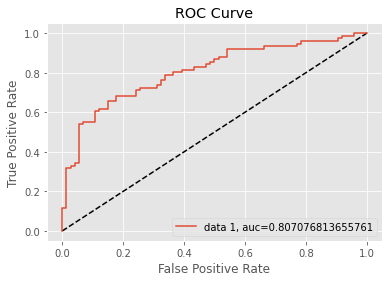

In [ ]:
from sklearn import metrics #confusion metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()